In [10]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import base64
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Open the NetCDF file
file_path = 'efficiency_snow_cover.nc'
dataset = nc.Dataset(file_path, mode='r')
# dataset.variables['spatial_ref']

In [11]:
# Extract snow cover
snow_cover = dataset.variables['Day_CMG_Snow_Cover'][0, :, :]

# Convert the array to bytes and encode the bytes in base64
snow_cover_bytes = snow_cover.tobytes()
snow_cover_base64 = base64.b64encode(snow_cover_bytes).decode('utf-8')

# Decode the base64 string back to bytes
decoded_bytes = base64.b64decode(snow_cover_base64)
decoded_array = np.frombuffer(decoded_bytes, dtype=snow_cover.dtype).reshape(snow_cover.shape)

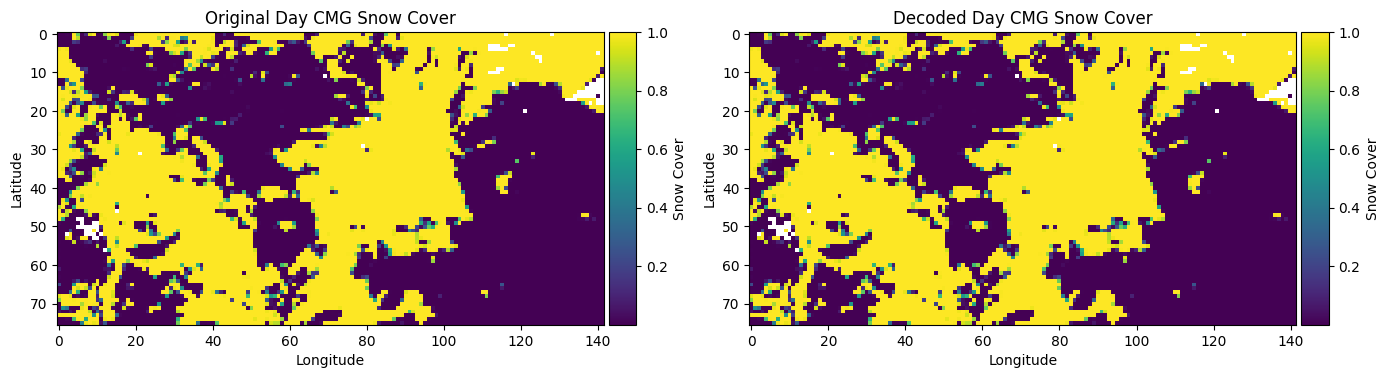

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot the original snow cover
im0 = axes[0].imshow(snow_cover, cmap='viridis')
axes[0].set_title('Original Day CMG Snow Cover')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# Adjust the colorbar to be shorter
divider0 = make_axes_locatable(axes[0])
cax0 = divider0.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax0, label='Snow Cover')
# fig.colorbar(axes[0].images[0], ax=axes[0], label='Snow Cover')

# Plot the decoded snow cover
im = axes[1].imshow(decoded_array, cmap='viridis')
axes[1].set_title('Decoded Day CMG Snow Cover')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
# Adjust the colorbar to be shorter

divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax, label='Snow Cover')

plt.tight_layout()
plt.show()

In [13]:
# # Plot the variable as an image
# plt.imshow(snow_cover, cmap='viridis')
# plt.colorbar(label='Snow Cover')
# plt.title('Day CMG Snow Cover')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()





# # Plot the decoded array as an image
# plt.imshow(decoded_array, cmap='viridis')
# plt.colorbar(label='Snow Cover')
# plt.title('Decoded Day CMG Snow Cover')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()